## Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

## Data Preprocessing

### Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 38742 files belonging to 38 classes.


### Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 13802 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[174.25 160.25 159.25]
   [177.75 163.75 162.75]
   [173.5  159.5  158.5 ]
   ...
   [ 49.    53.    10.75]
   [110.   124.    60.25]
   [123.   143.5   74.5 ]]

  [[177.25 163.25 162.25]
   [176.5  162.5  161.5 ]
   [179.5  165.5  164.5 ]
   ...
   [ 89.    93.5   43.  ]
   [106.75 121.25  55.75]
   [121.25 142.25  71.25]]

  [[184.   170.   169.  ]
   [173.5  159.5  158.5 ]
   [174.75 160.75 159.75]
   ...
   [ 88.5   95.5   40.  ]
   [115.25 129.75  62.25]
   [126.25 145.5   74.75]]

  ...

  [[180.75 170.75 168.75]
   [176.75 166.75 164.75]
   [191.5  181.5  179.5 ]
   ...
   [174.5  160.5  160.5 ]
   [176.5  162.5  162.5 ]
   [178.25 164.25 164.25]]

  [[185.   175.   173.  ]
   [182.75 172.75 170.75]
   [182.75 172.75 170.75]
   ...
   [177.25 163.25 163.25]
   [172.25 158.25 158.25]
   [170.25 156.25 156.25]]

  [[181.25 171.25 169.25]
   [174.   164.   162.  ]
   [182.25 172.25 170.25]
   ...
   [175.25 161.25 161.25]
   [174.   160.   160.  ]
   [167.5  153.5  15

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [ ]:
model = Sequential()

In [ ]:
## Building Convolution Layer

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1961s 2s/step - accuracy: 0.2713 - loss: 2.6539 - val_accuracy: 0.7443 - val_loss: 0.8177
Epoch 2/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1791s 1s/step - accuracy: 0.7318 - loss: 0.8574 - val_accuracy: 0.8547 - val_loss: 0.4506
Epoch 3/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1882s 2s/step - accuracy: 0.8428 - loss: 0.4889 - val_accuracy: 0.9041 - val_loss: 0.2990
Epoch 4/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 2885s 2s/step - accuracy: 0.8907 - loss: 0.3361 - val_accuracy: 0.9002 - val_loss: 0.3200
Epoch 5/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 2142s 2s/step - accuracy: 0.9206 - loss: 0.2444 - val_accuracy: 0.9131 - val_loss: 0.2804
Epoch 6/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1819s 2s/step - accuracy: 0.9398 - loss: 0.1889 - val_accuracy: 0.9331 - val_loss: 0.2146
Epoch 7/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1833s 2s/step - accuracy: 0.9486 - loss: 0.1536 - val_accuracy: 0.9148 - val_loss: 0.2899
Epoch 8/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1857s 2s/step - accuracy: 0.9598 -

## Model Evaluation

In [ ]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

1211/1211 ━━━━━━━━━━━━━━━━━━━━ 573s 473ms/step - accuracy: 0.9847 - loss: 0.0472


In [ ]:
print(train_loss,train_acc)

0.041341837495565414 0.9868876338005066


In [ ]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

432/432 ━━━━━━━━━━━━━━━━━━━━ 209s 484ms/step - accuracy: 0.9410 - loss: 0.2048


In [ ]:
print(val_loss,val_acc)

0.21037860214710236 0.9401535987854004


In [ ]:
model.save("plant_trained_model.keras")

In [ ]:
training_history.history

{'accuracy': [0.4597594439983368,
  0.767074465751648,
  0.8573383092880249,
  0.8997470736503601,
  0.9258427619934082,
  0.9406070709228516,
  0.9524288773536682,
  0.9605854153633118,
  0.9671416282653809,
  0.9701873660087585],
 'loss': [1.8791980743408203,
  0.73583984375,
  0.443493515253067,
  0.30661794543266296,
  0.22539936006069183,
  0.18261796236038208,
  0.1449228674173355,
  0.11611021310091019,
  0.09996258467435837,
  0.09038174897432327],
 'val_accuracy': [0.7443124055862427,
  0.8546587228775024,
  0.9041443467140198,
  0.9001594185829163,
  0.9130560755729675,
  0.933053195476532,
  0.9147949814796448,
  0.9325460195541382,
  0.9500796794891357,
  0.9401535987854004],
 'val_loss': [0.8177036643028259,
  0.4505695402622223,
  0.29901042580604553,
  0.31996023654937744,
  0.28044891357421875,
  0.21458901464939117,
  0.2898891270160675,
  0.23208288848400116,
  0.17164061963558197,
  0.2103787362575531]}

In [ ]:
#Recording History in json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

[0.7443124055862427,
 0.8546587228775024,
 0.9041443467140198,
 0.9001594185829163,
 0.9130560755729675,
 0.933053195476532,
 0.9147949814796448,
 0.9325460195541382,
 0.9500796794891357,
 0.9401535987854004]

### Accuracy Visualization

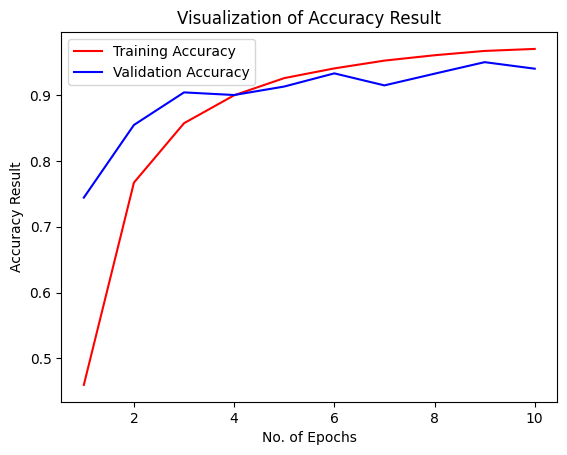

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 33 files belonging to 1 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


(array([[3.0125276e-09, 2.7511021e-12, 9.9999702e-01, ..., 5.9097488e-10,
         3.4114200e-10, 1.5769341e-09],
        [5.7136629e-07, 8.3033935e-09, 9.9991250e-01, ..., 2.9055641e-08,
         3.5760168e-09, 2.8839522e-09],
        [5.8579194e-06, 3.6220654e-06, 9.4415355e-01, ..., 6.6229593e-05,
         4.4357934e-04, 1.8098698e-06],
        ...,
        [4.0902815e-12, 2.0073589e-12, 1.1098216e-08, ..., 9.9999905e-01,
         5.1324911e-10, 1.9963446e-11],
        [5.7256158e-21, 2.3719247e-21, 1.8320149e-13, ..., 1.0000000e+00,
         5.6882921e-17, 1.3228279e-19],
        [6.4369515e-26, 2.3104939e-27, 4.4234923e-18, ..., 1.0000000e+00,
         2.6717258e-20, 5.5472691e-24]], dtype=float32),
 (33, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([ 2,  2,  2,  2,  0,  0, 20,  8,  8,  8, 20, 20, 20, 20, 20, 22, 22,
       30, 30, 35, 29, 29, 33, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35],
      dtype=int64)>